
# 1.-Datos Covid sin cluster

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [3]:
Categories=['Otras causas','COVID-19']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");


Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball


Cargamos los datos

In [4]:
import random

# Establecer la semilla
random.seed(42)

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

flat_data_arr = []
target_arr = []
image_names_arr = []  
# Por favor, utiliza datadir='/content' si los archivos se cargan en Google Colab
# De lo contrario, monta la unidad y proporciona la ruta del directorio principal que contiene todas las carpetas de imágenes de categoría.
datadir = r'C:\Users\andre\Desktop\images\carpeta_otras'

# Iterar sobre las categorías
for i in Categories:
    print(f'Cargando... categoría: {i}')
    path = os.path.join(datadir, i)
    images_in_category = os.listdir(path)
    # Seleccionar solo el 10% de las imágenes en la categoría actual
    num_images_to_select = int(1 * len(images_in_category))
    selected_images = np.random.choice(images_in_category, num_images_to_select, replace=False)

    for img in selected_images:
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (60, 60, 3))
        flat_data_arr.append(img_resized)
        target_arr.append(Categories.index(i))
        image_names_arr.append(img)  # Guardar el nombre de la imagen
    print(f'Categoría cargada correctamente: {i}')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)



Cargando... categoría: Otras causas
Categoría cargada correctamente: Otras causas
Cargando... categoría: COVID-19


In [ ]:
target

In [ ]:
import numpy as np

# Calcula la media y la desviación estándar de flat_data
mean_value = np.mean(flat_data)
std_value = np.std(flat_data)

print("Media de los datos:", mean_value)
print("Desviación estándar de los datos:", std_value)


In [ ]:
max_value = np.max(flat_data)
min_value = np.min(flat_data)

In [ ]:
print(max_value )
print(min_value )

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

rows = 2
cols = 6

for n, i in enumerate(list(np.random.randint(0, len(flat_data), rows * cols))):
    plt.subplot(rows, cols, n+1)
    plt.imshow(flat_data[i])
    plt.title(Categories[target[i]])
    plt.axis('off')

plt.tight_layout()
plt.savefig('covid.png')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Supongamos que 'target' es tu variable de destino
colores = ['#73A4CA', '#91DCEA', '#64CDCC', '#5FBB68', '#F9D23C', '#F9A729', '#FD6F30']

# Convert hexadecimal colors to RGBA
colores_rgba = [mcolors.to_rgba(color) if len(color) == 7 else mcolors.to_rgba(color + 'FF') for color in colores]

# Crear un DataFrame con los datos
df = pd.DataFrame(target, columns=['Labels'])

# Convertir 0 y 1 de 'target' a 'Parasitized' y 'Uninfected'
df['Labels'] = df['Labels'].replace({0: 'Bacteriana', 1: 'COVID-19'})

# Gráfico de conteo con las categorías 'Parasitized' y 'Uninfected'
sx = sns.countplot(x='Labels', data=df, palette=colores_rgba)

# Añadir etiquetas a los ejes x e y
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Añadir título al gráfico
plt.title('Gráfico de frecuencias')

# Añadir el número de conteo encima de cada barra
for p in sx.patches:
    sx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Guardar el gráfico como imagen
plt.savefig('frecuencias.png')

# Mostrar el gráfico
plt.show()


## Prepoceso de datos

In [ ]:
Data2 = []  # Asegúrate de que esta lista está creada antes de usarla

for img in flat_data:
    # Aplana la imagen y agrega la fila a la lista
    Data2.append(img.flatten())

# Convierte la lista de imágenes aplanadas a un array NumPy
Data2 =  pd.DataFrame(Data2)

In [ ]:
df_image_names = pd.DataFrame(image_names_arr, columns=['filename'])
Data_final = pd.concat([Data2, df_image_names], axis=1)

In [ ]:
Data_final

In [ ]:
import pandas as pd

# Ruta del archivo XLSX que contiene los nombres de las imágenes
archivo_imagenes_xlsx = "C:\\Users\\andre\\Desktop\\2º Cuatri\\TFG\\codigo\\final\\dfXY3.xlsx"

# Cargar el archivo XLSX
df_imagenes = pd.read_excel(archivo_imagenes_xlsx)
df_merged = pd.merge(Data_final, df_imagenes, on='filename', how='inner')

In [ ]:
df_merged

In [ ]:
target2=df_merged['target'] 
df_merged2=df_merged.iloc[:, :10800]

In [ ]:
df_merged2

In [ ]:
num_filas, num_columnas = df_merged2.shape

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

In [ ]:
import random

# Establecer la semilla
random.seed(42)

In [ ]:
# División en datos de entrenamiento (70%) y datos restantes (30%)
trainX2,testX2, y_train, y_test = train_test_split(df_merged2, target2, test_size=0.20, random_state=77, stratify=target2)


print('Datos divididos con éxito.')

In [ ]:
print(len(y_test))
print(len(y_train))
#print(len(y_valid))

# 4.- SVM lineal

In [39]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Supongamos que x1_train, y1_train son tus datos de entrenamiento

# Definir el espacio de búsqueda para los hiperparámetros del clasificador
param_grid = {
    'C': [0.0001,0.001,0.01, 0.1, 1]
}
#0.01, 0.1, 1, 10, 100
# Definir el clasificador (SVC) directamente sin pipeline
classifier = LinearSVC()
cv = KFold(n_splits=4, shuffle=True, random_state=42)
scoring = "f1"
# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros
grid_search = GridSearchCV(classifier, param_grid, cv=cv, scoring=scoring, n_jobs=-1)


In [40]:
grid_search.fit(trainX2, y_train)

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]}, scoring='f1')

In [41]:
# Imprimir los mejores parámetros encontrados y el mejor score
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", round(grid_search.best_score_,3))

Mejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.572


Mejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.638745556702213
Los mejores hiperparámetros son: {'C': 0.01}
La puntuación de la validación cruzada es: 0.64

Mejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.572

Mejores Parámetros: {'C': 0.001}
Mejor Score F1: 0.54 k=3

## 4.1.- Evaluo el modelo

In [42]:
from sklearn.metrics import f1_score

In [43]:
y_pred = best_model.predict(testX2)
# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred))
print(f"El modelo entrenado con todos los datos fue: {best_model}")

Precisión en el conjunto de prueba: 0.6274509803921569
El modelo entrenado con todos los datos fue: LinearSVC(C=0.01)


## 4.2.- Matriz de confusión

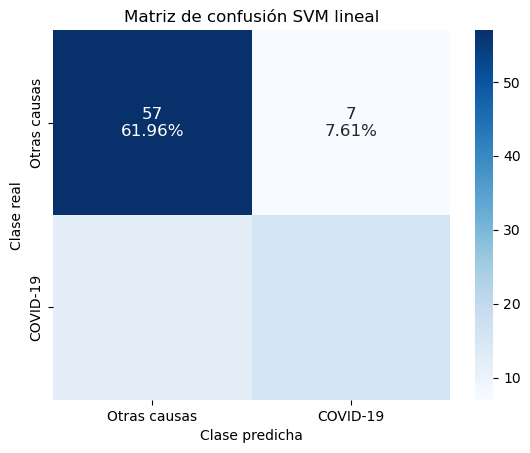

In [44]:
# Crear el DataFrame de la matriz de confusión
cf_matrix = confusion_matrix(y_test,y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM lineal')
plt.show()


In [45]:
cf_matrix

array([[57,  7],
       [12, 16]], dtype=int64)

## 4.3.- Métricas

In [46]:
from sklearn import metrics

num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


Especificidad:	0.89


In [47]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        64
           1       0.70      0.57      0.63        28

    accuracy                           0.79        92
   macro avg       0.76      0.73      0.74        92
weighted avg       0.79      0.79      0.79        92



## 4.4.- Curva ROC

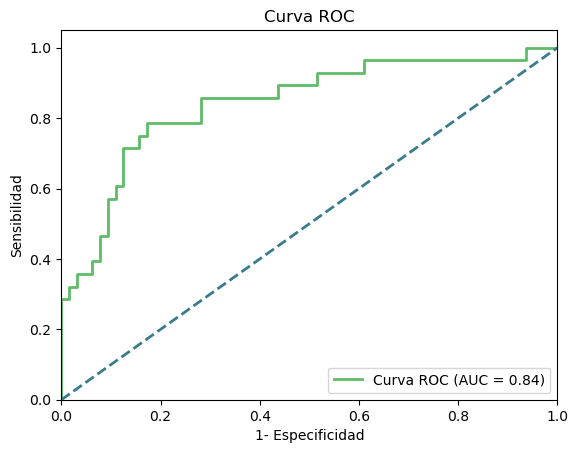

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores = best_model.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('curva_roc2.png')
plt.show()


# 5.- SVM NO LINEAL: Kernel lineal, cuadrático y gausiano

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 5.1.- SVM Kernel lineal

In [ ]:
param_grid_linear = [
    {
        "C":  [0.0001,0.001,0.01, 0.1, 1],
        "kernel": ["linear"]
   }
]
#0.01, 0.1, 1, 10, 100

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC

# Definir métrica y mecanismos de evaluación interno
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "f1"

# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros para cada modelo

# Modelo con kernel lineal
pipeline_linear = SVC()
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=cv, scoring=scoring, n_jobs=-1)


In [57]:
grid_search_linear.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['linear']}],
             scoring='f1')

In [58]:
best_score_linear = grid_search_linear.best_score_
best_params_linear = grid_search_linear.best_params_
best_model_linear = grid_search_linear.best_estimator_

In [59]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_linear:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_linear}")
print(f"El mejor modelo fue: {best_model_linear}")

El mejor F1-score obtenido en la validación interna fue: 0.582
Los mejores valores de los otros hiperparámetros fueron: {'C': 0.01, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=0.01, kernel='linear')


El mejor F1-score obtenido en la validación interna fue: 0.582
Los mejores valores de los otros hiperparámetros fueron: {'C': 0.01, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=0.01, kernel='linear')

## 5.3.- Evaluación SVM lineal

In [60]:
# Importa las librerías necesarias
from sklearn.metrics import f1_score

# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_linear = best_model_linear.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_linear))

# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_linear)


Precisión en el conjunto de prueba: 0.5833333333333334
El mejor modelo encontrado fue: SVC(C=0.01, kernel='linear')


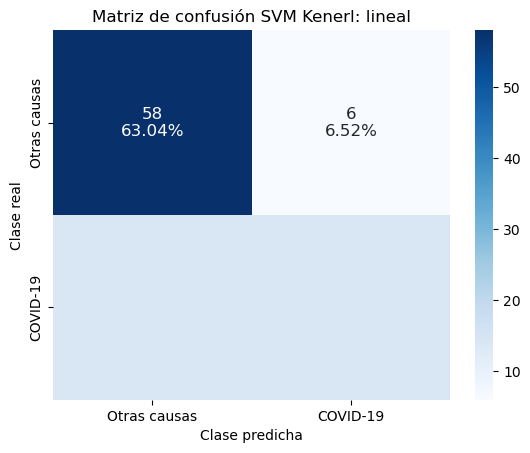

In [61]:
# Crear el DataFrame de la matriz de confusión
cf_matrix_linear = confusion_matrix(y_test,y_pred_linear)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_linear.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_linear.flatten()/np.sum(cf_matrix_linear)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix_linear.shape[0], cf_matrix_linear.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix_linear = pd.DataFrame(cf_matrix_linear, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix_linear, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: lineal')
plt.show()


In [62]:
cf_matrix_linear

array([[58,  6],
       [14, 14]], dtype=int64)

In [63]:

# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
  


Especificidad:	0.89


In [64]:
report = classification_report(y_test, y_pred_linear,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        64
           1       0.70      0.50      0.58        28

    accuracy                           0.78        92
   macro avg       0.75      0.70      0.72        92
weighted avg       0.77      0.78      0.77        92



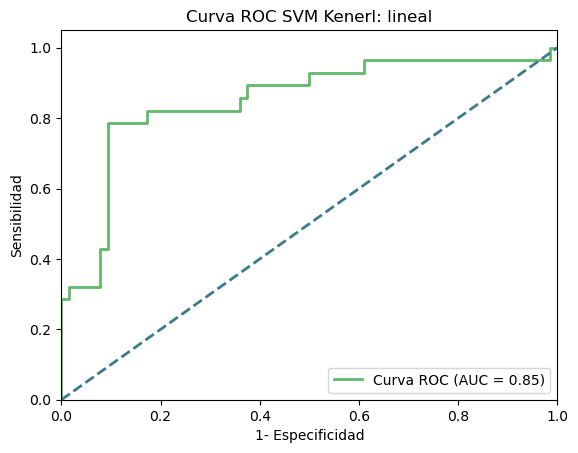

In [65]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores1 = best_model_linear.decision_function(testX2)
n_classes=2

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr1, tpr1, _ = roc_curve(y_test_bin, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr1, tpr1, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SVM Kenerl: lineal')
plt.legend(loc="lower right")
plt.savefig('curva_roc3.png')
plt.show()

## 5.2.- SVM poly

In [71]:
param_grid_poly = [
    {
        "C":  [1, 10, 100,1000,10000],
        "kernel": ["poly"],
        "degree": [2],
        "coef0": np.linspace(0, 1, 10)
    }
]
#0.01, 0.1, 1, 10, 100

In [72]:
pipeline_poly = SVC()
grid_search_poly = GridSearchCV(pipeline_poly, param_grid_poly, cv=cv, scoring=scoring, n_jobs=-1)

In [73]:
grid_search_poly.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'coef0': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'degree': [2], 'kernel': ['poly']}],
             scoring='f1')

In [74]:
best_score_poly = grid_search_poly.best_score_
best_params_poly = grid_search_poly.best_params_
best_model_poly = grid_search_poly.best_estimator_

In [75]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_poly:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_poly}")
print(f"El mejor modelo fue: {best_model_poly}")

El mejor F1-score obtenido en la validación interna fue: 0.595
Los mejores valores de los otros hiperparámetros fueron: {'C': 100, 'coef0': 0.1111111111111111, 'degree': 2, 'kernel': 'poly'}
El mejor modelo fue: SVC(C=100, coef0=0.1111111111111111, degree=2, kernel='poly')


El mejor F1-score obtenido en la validación interna fue: 0.595
Los mejores valores de los otros hiperparámetros fueron: {'C': 100, 'coef0': 0.1111111111111111, 'degree': 2, 'kernel': 'poly'}
El mejor modelo fue: SVC(C=100, coef0=0.1111111111111111, degree=2, kernel='poly')

### 5.2.1.- Evaluación SVM POLY

In [76]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_poly = best_model_poly.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_poly))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_poly)

Precisión en el conjunto de prueba: 0.6545454545454545
El mejor modelo encontrado fue: SVC(C=100, coef0=0.1111111111111111, degree=2, kernel='poly')


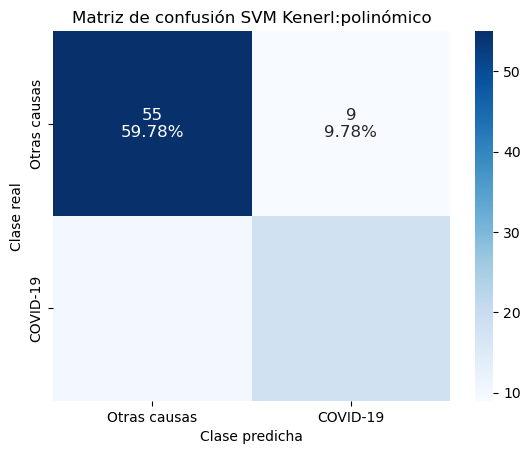

In [77]:
# Crear el DataFrame de la matriz de confusión
cf_matrix2 = confusion_matrix(y_test,y_pred_poly)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix2.shape[0], cf_matrix2.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix2, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl:polinómico')
plt.show()


In [78]:
cf_matrix2

array([[55,  9],
       [10, 18]], dtype=int64)

In [79]:
from sklearn import metrics

# Supongamos que ya tenemos la matriz de confusión (cf_matrix), Y_test y Y_test_pred definidas previamente

# Definir el número de clases
num_classes = 2
# Calcular la especificidad para cada clase
tn2 = cf_matrix2[0, 0]
fp2 = cf_matrix2[0, 1]  # Falsos positivos en la clase 0
specificity = tn2 / (tn2 + fp2)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


Especificidad:	0.86


In [80]:
report = classification_report(y_test, y_pred_poly,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        64
           1       0.67      0.64      0.65        28

    accuracy                           0.79        92
   macro avg       0.76      0.75      0.75        92
weighted avg       0.79      0.79      0.79        92



### 5.2.2.-Curva ROC POLY

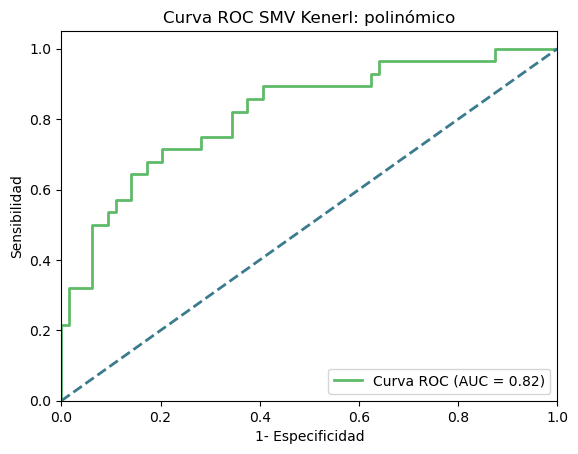

In [81]:

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores2 = best_model_poly.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr2, tpr2, _ = roc_curve(y_test_bin, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SMV Kenerl: polinómico')
plt.legend(loc="lower right")
plt.savefig('curva_roc4.png')
plt.show()

## 5.3.- SVM RBF

In [82]:
param_grid_rbf = [
       {
        "C":  [0.1, 1, 10, 100,1000],
        "kernel": ["rbf"],
        "gamma": np.logspace(-2, 2, 10)
    }
]
#0.01, 0.1, 1, 10, 100

In [86]:
param_grid_rbf = [
    {
        "C": [10, 100, 1000,10000,100000],
        "gamma": np.logspace(-4, 2, 10),
        "kernel": ["rbf"]
    }
]

In [87]:
pipeline_rbf = SVC()
grid_search_rbf = GridSearchCV(pipeline_rbf, param_grid_rbf, cv=cv, scoring=scoring, n_jobs=-1)
grid_search_rbf.fit(trainX2, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 100, 1000, 10000, 100000],
                          'gamma': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                          'kernel': ['rbf']}],
             scoring='f1')

In [88]:
best_score_rbf = grid_search_rbf.best_score_
best_params_rbf = grid_search_rbf.best_params_
best_model_rbf = grid_search_rbf.best_estimator_

In [89]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_rbf:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_rbf}")
print(f"El mejor modelo fue: {best_model_rbf}")

El mejor F1-score obtenido en la validación interna fue: 0.687
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'gamma': 0.002154434690031882, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=10, gamma=0.002154434690031882)


El mejor F1-score obtenido en la validación interna fue: 0.386
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=10, gamma=0.01)

In [ ]:
El mejor F1-score obtenido en la validación interna fue: 0.687
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'gamma': 0.002154434690031882, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=10, gamma=0.002154434690031882)

### 5.3.1.- Evaluación SVM RBF

In [90]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_rbf = best_model_rbf.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de test:', f1_score(y_test, y_pred_rbf))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_rbf)

Precisión en el conjunto de test: 0.68
El mejor modelo encontrado fue: SVC(C=10, gamma=0.002154434690031882)


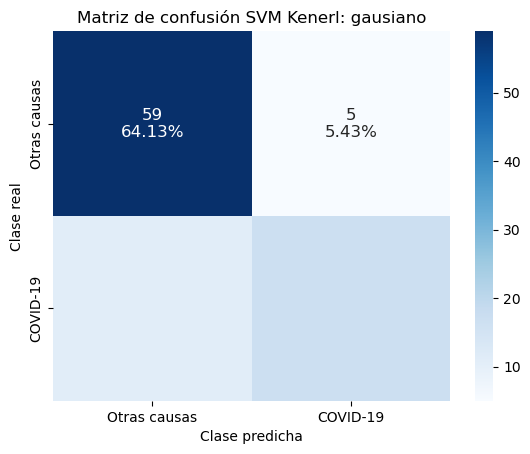

In [91]:
# Crear el DataFrame de la matriz de confusión
cf_matrix3 = confusion_matrix(y_test,y_pred_rbf)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix3.shape[0], cf_matrix3.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix3, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: gausiano')
plt.show()

In [92]:
cf_matrix3

array([[59,  5],
       [11, 17]], dtype=int64)

In [93]:
report = classification_report(y_test, y_pred_rbf, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        64
           1       0.77      0.61      0.68        28

    accuracy                           0.83        92
   macro avg       0.81      0.76      0.78        92
weighted avg       0.82      0.83      0.82        92



In [94]:
# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn3 = cf_matrix3[0, 0]
fp3 = cf_matrix3[0, 1]  # Falsos positivos en la clase 0
specificity = tn3 / (tn3 + fp3)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
   


Especificidad:	0.92


### 5.3.2.- Curva ROC RBF

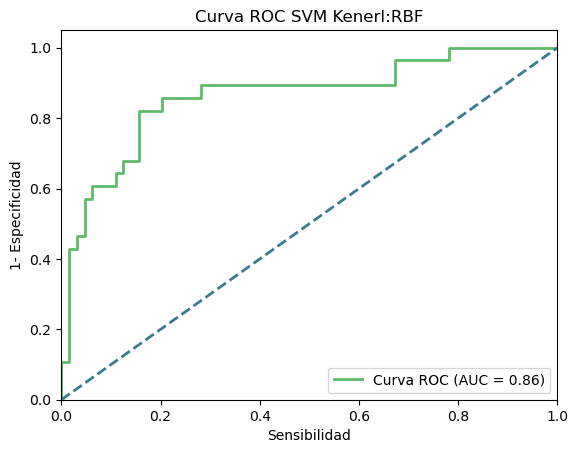

In [95]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores3 = best_model_rbf.decision_function(testX2)


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr3, tpr3, _ = roc_curve(y_test_bin, y_scores3)
roc_auc3 = auc(fpr3, tpr3)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr3, tpr3, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensibilidad')
plt.ylabel('1- Especificidad')
plt.title('Curva ROC SVM Kenerl:RBF')
plt.legend(loc="lower right")
plt.savefig('curva_roc5.png')
plt.show()

# 6.- Conclusiones

## 6.1.- Conclusión SVM no lineal

Resultados datos de entrenamiento

In [96]:
# Crear un catálogo para almacenar los mejores puntajes y parámetros de cada modelo
best_results = {
    "Modelo Lineal": {
        "best_score": best_score_linear,
        "best_params": best_params_linear
    },
    "Modelo Polinomial": {
        "best_score": best_score_poly,
        "best_params": best_params_poly
    },
    "Modelo RBF": {
        "best_score": best_score_rbf,
        "best_params": best_params_rbf
    }
}

# Imprimir el catálogo de mejores resultados para cada modelo
for modelo, resultados in best_results.items():
    print(f"Modelo: {modelo}")
    print(f"Mejor Puntaje: {resultados['best_score']:.3f}")
    print(f"Mejores Parámetros: {resultados['best_params']}")
    print()


Modelo: Modelo Lineal
Mejor Puntaje: 0.582
Mejores Parámetros: {'C': 0.01, 'kernel': 'linear'}

Modelo: Modelo Polinomial
Mejor Puntaje: 0.595
Mejores Parámetros: {'C': 100, 'coef0': 0.1111111111111111, 'degree': 2, 'kernel': 'poly'}

Modelo: Modelo RBF
Mejor Puntaje: 0.687
Mejores Parámetros: {'C': 10, 'gamma': 0.002154434690031882, 'kernel': 'rbf'}



Resultados datos de test

In [97]:
print('F1 en el conjunto de prueba linear:', round(f1_score(y_test, y_pred_linear), 4))
print('F1 en el conjunto de prueba poly:', round(f1_score(y_test, y_pred_poly), 4))
print('F1 en el conjunto de prueba rbf:', round(f1_score(y_test, y_pred_rbf), 4))

F1 en el conjunto de prueba linear: 0.5833
F1 en el conjunto de prueba poly: 0.6545
F1 en el conjunto de prueba rbf: 0.68


In [98]:
# Imprimir el AUC para cada modelo
print("AUC para el modelo lineal:", round(roc_auc1, 4))
print("AUC para el modelo polinomial:", round(roc_auc2, 4))
print("AUC para el modelo RBF:", round(roc_auc3, 4))

AUC para el modelo lineal: 0.8504
AUC para el modelo polinomial: 0.8175
AUC para el modelo RBF: 0.8627


## 6.2.- Comparar SVM lineal vs SVM no lineal kernel lineal

Resultados datos de entrenamiento

In [99]:
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", grid_search.best_score_)

Mejores Parámetros: {'C': 0.01}
Mejor Score F1: 0.5717874717874718


Resultados datos de test

In [100]:
print('Precisión en el conjunto de prueba SVM lineal:', round(f1_score(y_test, y_pred),4))

Precisión en el conjunto de prueba SVM lineal: 0.6275


In [101]:
print("AUC para el modelo SVM lineal:", round(roc_auc, 4))

AUC para el modelo SVM lineal: 0.8421


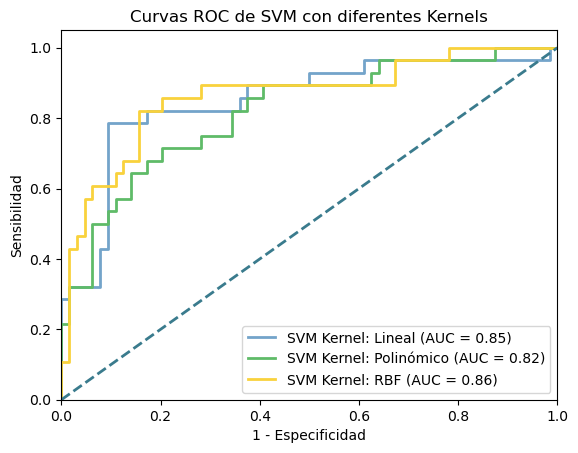

In [102]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar la primera curva ROC
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)

# Trazar la segunda curva ROC
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)

# Trazar la tercera curva ROC
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM con diferentes Kernels')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()


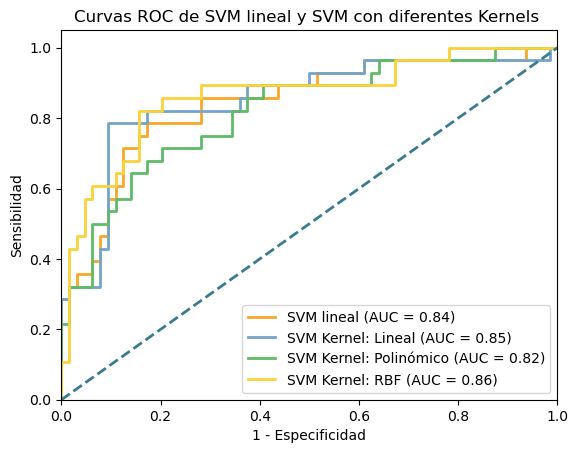

In [108]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar las curvas ROC de los diferentes kernels SVM
ax.plot(fpr, tpr, color='#F9A729', lw=2, label='SVM lineal (AUC = %0.2f)' % roc_auc)
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Trazar la curva ROC del modelo específico


# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM lineal y SVM con diferentes Kernels ')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()
